## Working with a larger example ( Multiclass Classification )

When you have more than 2 classes as an option, its called **multi-classs classification**
* This means if you have 3 classes its multi-class classification problem
* If you have 100 differenet class its also multi-class classification problem


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

2023-09-05 09:24:55.124424: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-05 09:24:55.188764: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 09:24:55.475439: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 09:24:55.476518: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 09:24:56.439749: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape, train_data[0].shape

((60000, 28, 28), (28, 28))

In [4]:
# Show the first training examples 
print(f"Training Data \n {train_data[0]}")
print(f"Train Label \n {train_labels[0]}")

Training Data 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

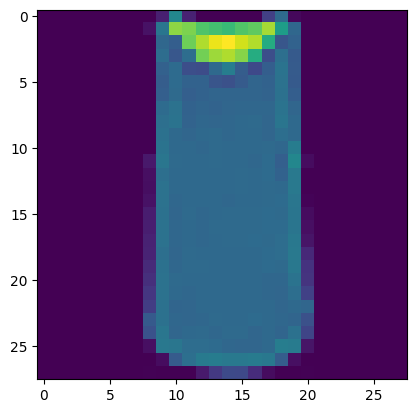

In [5]:
# Plot a single Example
plt.imshow(train_data[2])

In [6]:
# Create a small list so we can index  on our data that is humen readable instead of class numbers 
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

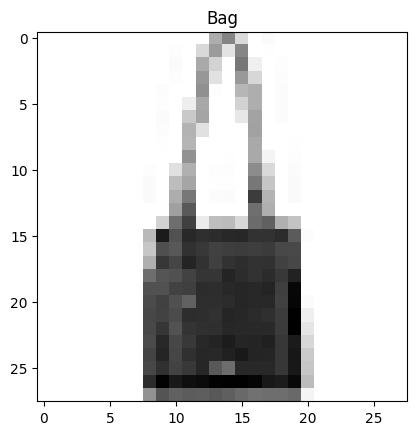

In [7]:
index = 200
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

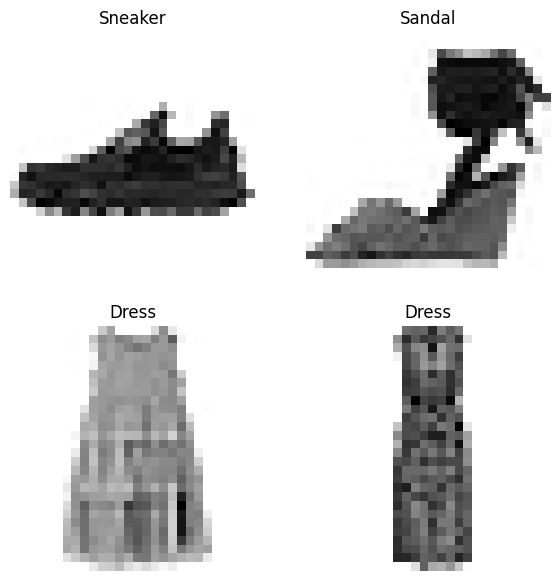

In [8]:
import random
plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


## Building a Multiclass Classification Model

For our multiclass classification model we can use similar model to binary classificaiton but we need to change some things.

* Input Shape: 28 x 28 (the shape of 1 image)
* Output Shape: 10 classes in our data
* Loss Function: tf.keras.losses.CategoricalCrossentropy()
  * If your Labels are one hot encoded use CategoricalCrossentropy()
  * Else if your labels are integer form use SparseCategoricalCrossentropy( )
* Output Activation: Softmax() not Sigmoid()

In [9]:
train_data[0].shape, len(class_names)

((28, 28), 10)

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 4. Train the model

non_norm_history = model_1.fit(train_data,tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data,tf.one_hot(test_labels,depth=10)))


Epoch 1/10


2023-09-05 09:24:58.802985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


1875/1875 [==============================] - 2s 1ms/step - loss: 1.7739 - accuracy: 0.2824 - val_loss: 1.5205 - val_accuracy: 0.3531
Epoch 2/10
1875/1875 [==============================] - 2s 880us/step - loss: 1.4187 - accuracy: 0.3636 - val_loss: 1.3707 - val_accuracy: 0.3759
Epoch 3/10
1875/1875 [==============================] - 2s 974us/step - loss: 1.3622 - accuracy: 0.3759 - val_loss: 1.3638 - val_accuracy: 0.3765
Epoch 4/10
1875/1875 [==============================] - 1s 778us/step - loss: 1.3525 - accuracy: 0.3869 - val_loss: 1.3775 - val_accuracy: 0.3985
Epoch 5/10
1875/1875 [==============================] - 2s 858us/step - loss: 1.3169 - accuracy: 0.4008 - val_loss: 1.3505 - val_accuracy: 0.3976
Epoch 6/10
1875/1875 [==============================] - 2s 862us/step - loss: 1.3276 - accuracy: 0.4083 - val_loss: 1.3333 - val_accuracy: 0.3988
Epoch 7/10
1875/1875 [==============================] - 2s 816us/step - loss: 1.3182 - accuracy: 0.4147 - val_loss: 1.2941 - val_accuracy

In [11]:
# Check the model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min and max values of train and test data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled ( or normalized ), this means they like numbers in the tensor to be in the range 0, 1. ( Normalised Data)

- Right now we have 0 and 255 as our min and max values. We need to normlize this to be in range between 0 and 1

In [13]:
# We can get our training and testing data between 0 and 1 by dividing the data by maximum
train_data_norm = train_data/255.
test_data_norm = test_data/255.

# Check the min and max values of the scaled train and test data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
# Now our data is normalised, let's build a model to find patterns in it

# set the random seed
tf.random.set_seed(42)

# create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                           train_labels,
                           epochs=10, 
                           validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 2s 931us/step - loss: 1.4519 - accuracy: 0.4281 - val_loss: 1.1334 - val_accuracy: 0.5239
Epoch 2/10
1875/1875 [==============================] - 2s 824us/step - loss: 1.0209 - accuracy: 0.6076 - val_loss: 0.9652 - val_accuracy: 0.6600
Epoch 3/10
1875/1875 [==============================] - 2s 844us/step - loss: 0.8948 - accuracy: 0.6718 - val_loss: 0.8846 - val_accuracy: 0.6718
Epoch 4/10
1875/1875 [==============================] - 2s 820us/step - loss: 0.8321 - accuracy: 0.6907 - val_loss: 0.8364 - val_accuracy: 0.6975
Epoch 5/10
1875/1875 [==============================] - 2s 810us/step - loss: 0.7857 - accuracy: 0.7256 - val_loss: 0.7825 - val_accuracy: 0.7429
Epoch 6/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.7505 - accuracy: 0.7471 - val_loss: 0.7829 - val_accuracy: 0.7408
Epoch 7/10
1875/1875 [==============================] - 2s 804us/step - loss: 0.7318 - accuracy: 0.7508 - val_loss: 0.7744 -

**NOTE**: Nueral Networks tends to Perform better when data is normalized

<Axes: title={'center': 'Normalized Data'}>

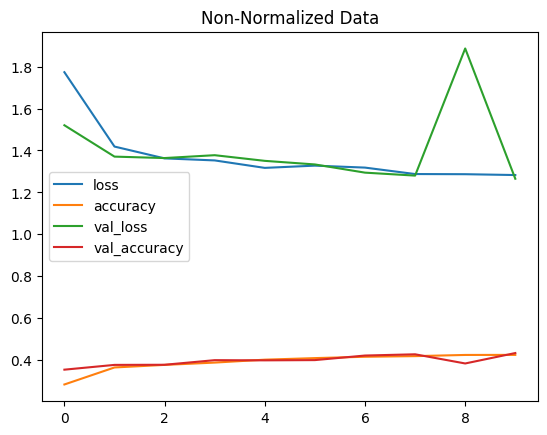

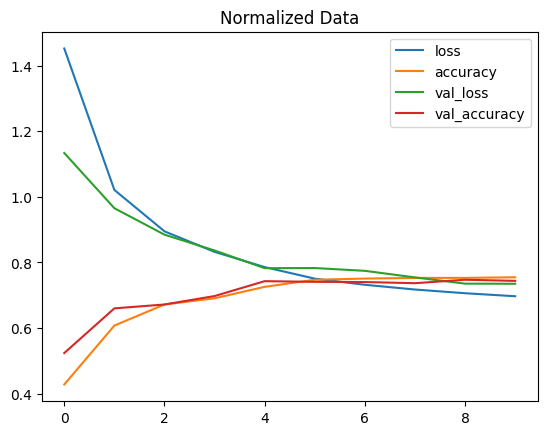

In [15]:
import pandas as pd

# Lets compare the loss curves of each model

# plot non-normalized plot curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# Plot the Normalized plot curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

* A same model with Slightly different data can produce *dramatically* different results. So when comparing the models, it's important to make sure you're comparing them on the same criteria e,g. (same data but different model architectures or different data but same model architecture).

## Finding the ideal learning rate


In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# create the learning rate schedular callback
learning_rate_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

# 3. Fit the model 
find_lr_rate = model_3.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           callbacks=[learning_rate_schedular],
                           validation_data=(test_data_norm,test_labels))

Epoch 1/40
1875/1875 [==============================] - 2s 895us/step - loss: 1.4599 - accuracy: 0.4102 - val_loss: 1.1803 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 2s 823us/step - loss: 1.0521 - accuracy: 0.5591 - val_loss: 0.9832 - val_accuracy: 0.6097 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 2s 882us/step - loss: 0.9117 - accuracy: 0.6470 - val_loss: 0.8951 - val_accuracy: 0.6387 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 2s 850us/step - loss: 0.8615 - accuracy: 0.6764 - val_loss: 0.8662 - val_accuracy: 0.6807 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 835us/step - loss: 0.8360 - accuracy: 0.6886 - val_loss: 0.8512 - val_accuracy: 0.6948 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 2s 858us/step - loss: 0.8202 - accuracy: 0.6958 - val_loss: 0.8747 - val_accuracy: 0.6832 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Learning rate VS Loss')

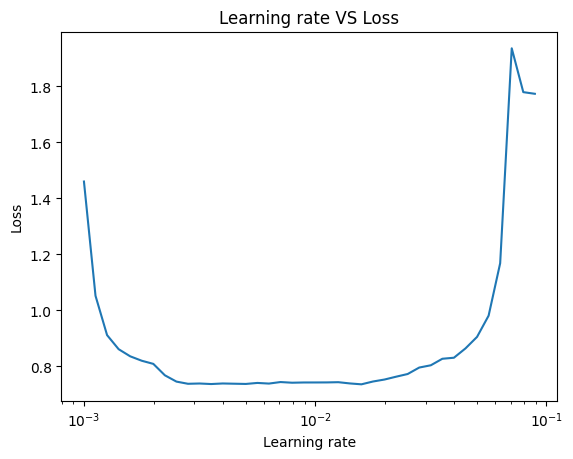

In [17]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_rate.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Learning rate VS Loss")

In [18]:
10**-3

0.001

In [19]:
## Let's refit the model with the ideal learning rate.

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_4_history = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9984 - accuracy: 0.6296 - val_loss: 0.7411 - val_accuracy: 0.7413
Epoch 2/20
1875/1875 [==============================] - 2s 923us/step - loss: 0.6859 - accuracy: 0.7606 - val_loss: 0.6924 - val_accuracy: 0.7566
Epoch 3/20
1875/1875 [==============================] - 2s 931us/step - loss: 0.6378 - accuracy: 0.7783 - val_loss: 0.6597 - val_accuracy: 0.7715
Epoch 4/20
1875/1875 [==============================] - 2s 952us/step - loss: 0.6148 - accuracy: 0.7851 - val_loss: 0.6398 - val_accuracy: 0.7820
Epoch 5/20
1875/1875 [==============================] - 2s 849us/step - loss: 0.6011 - accuracy: 0.7875 - val_loss: 0.6221 - val_accuracy: 0.7847
Epoch 6/20
1875/1875 [==============================] - 2s 830us/step - loss: 0.5894 - accuracy: 0.7928 - val_loss: 0.6098 - val_accuracy: 0.7900
Epoch 7/20
1875/1875 [==============================] - 1s 792us/step - loss: 0.5804 - accuracy: 0.7961 - val_loss: 0.6462 - v

## Evaluating Our Model Performance

To Eveluate our multi-class classification model we could:
- Evaluate its performance using other classification matrices (such as confusion_matrix)
- Asses some of its predictions ( through Visualizations )
- Improve its performance ( By changing its architecture or training for longer )
- Save and export it for later use in an application

In [20]:
import itertools 
from sklearn.metrics import confusion_matrix

def  make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    # Create the confusion matrix 
    cm  = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Lets preetify the Confusion matrix now.
    fig, ax = plt.subplots(figsize=figsize)

    # Create a Matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Labels the axis
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set the X-axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust Label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot some text on each cell
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i,j] > threshold else "black", size=text_size)

In [21]:
# Make some Predictions with Our Model
y_probs  = model_4.predict(test_data_norm)

313/313 [==============================] - 0s 491us/step


In [22]:
# View the first 5 predictions
class_names, tf.argmax(y_probs[0])

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [23]:
# Convert the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[681,  24,  21, 112,   7,   1, 145,   0,   9,   0],
       [  0, 965,   5,  25,   2,   0,   3,   0,   0,   0],
       [ 11,   6, 653,  10, 238,   0,  81,   0,   1,   0],
       [ 30,  21,   5, 822,  33,  14,  68,   1,   6,   0],
       [  0,  10,  84,  19, 823,   0,  61,   0,   3,   0],
       [  0,   0,   0,   2,   1, 921,   0,  35,   5,  36],
       [114,  28, 100,  67, 267,   2, 407,   0,  15,   0],
       [  0,   0,   0,   0,   0,  60,   0, 862,   1,  77],
       [  1,   2,   2,  18,  38,  17,  32,   6, 884,   0],
       [  0,   0,   0,   0,   0,  20,   0,  27,   1, 952]])

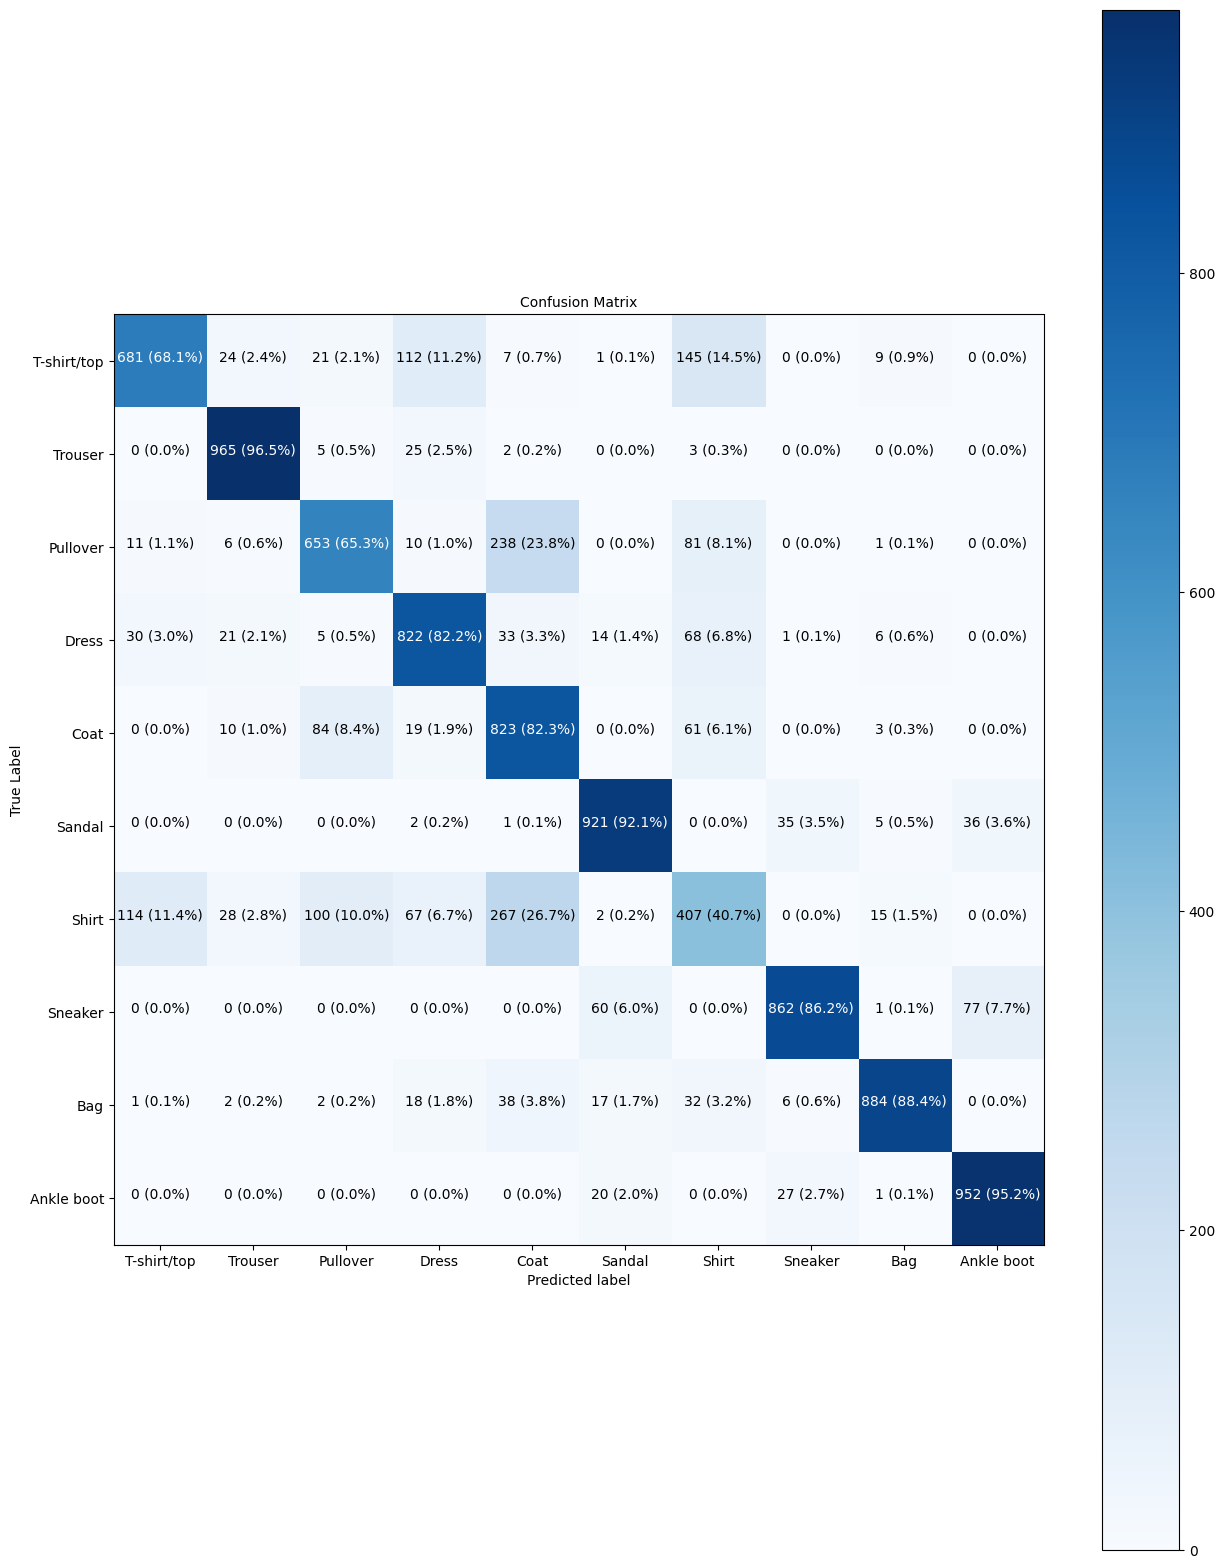

In [25]:
make_confusion_matrix(test_labels, y_preds, class_names, (15,20), 10 )

In [26]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 13ms/step


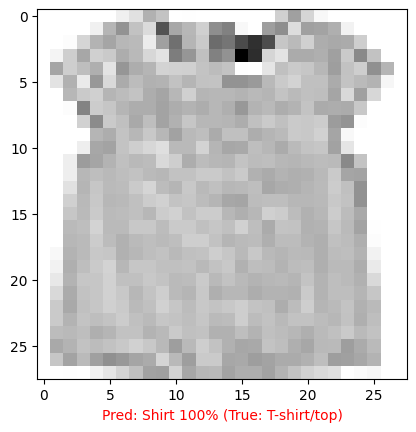

In [32]:
# heck out a random image as well as its prediction
plot_random_image(model=model_4, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)